# Telecom Churn Case Study

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [91]:
data = pd.read_csv('telecom_churn_data.csv')
data.shape

(99999, 226)

In [92]:
data.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [93]:
# inspecting columns
sorted(list(data.columns))

['aon',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'aug_vbc_3g',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'circle_id',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9',
 'ic_others_6',
 'ic_others_7',
 'ic_others_8',
 'ic_others_9',
 'isd_ic_mou_6',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'isd_ic_mou_9',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_9',
 'jul_vbc_3g',
 'jun_vbc_3g',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_

In [94]:
list(filter(lambda x : "vbc" in x, sorted(data.columns)))

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [95]:
# rename vbc columns to keep format uniform
data.rename(columns = {'jun_vbc_3g': 'vbc_3g_6',
                       'jul_vbc_3g': 'vbc_3g_7',
                       'aug_vbc_3g': 'vbc_3g_8',
                       'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [96]:
months = ['_6', '_7', '_8', '_9']

# util functions

def isMonthColumn(columnName):
    return len(list(filter(lambda x: x in columnName, months))) > 0

def isLastMonthColumn(columnName):
    return months[len(months)-1] in columnName

def getMonthColumns(key=None):
    month_cols = list(filter(lambda x : isMonthColumn(x), sorted(data.columns)))
    if key is None:
        return month_cols;
    return list(filter(lambda x: key in x, month_cols))

def getNonMonthColumns():
    return list(filter(lambda x : isMonthColumn(x) == 0, sorted(data.columns)))

def snapMissingValues(columns):
    return pd.concat([data[columns].isnull().sum() / len(data) * 100, data[columns].dtypes],
          axis = 1, keys=['missing%', 'dtype']).sort_values(by='missing%',ascending=False)

In [97]:
# find how many columns are related to month
print("The number of months based columns are:", len(getMonthColumns()))
print("The number of non-months columns are:", len(getNonMonthColumns()))

The number of months based columns are: 220
The number of non-months columns are: 6


## Data Cleaning

### Handling missing values for non month columns

In [98]:
data[getNonMonthColumns()].dtypes

aon                 int64
circle_id           int64
loc_ic_t2o_mou    float64
loc_og_t2o_mou    float64
mobile_number       int64
std_og_t2o_mou    float64
dtype: object

In [99]:
snapMissingValues(getNonMonthColumns())

missing%    dtype
loc_ic_t2o_mou   1.01801  float64
loc_og_t2o_mou   1.01801  float64
std_og_t2o_mou   1.01801  float64
aon              0.00000    int64
circle_id        0.00000    int64
mobile_number    0.00000    int64

In [100]:
data.drop(columns=['circle_id', 'mobile_number', 'loc_ic_t2o_mou', 'loc_og_t2o_mou', 'std_og_t2o_mou'], inplace=True)

In [101]:
# inpute the missing values with Zero because these coulmns have meaningful missing values
data[getNonMonthColumns()] = data[getNonMonthColumns()].fillna(0)

### Handling missing values for month columns

Dropping `date` columns as they are of no use

In [102]:
# not drop and t
data.drop(columns=getMonthColumns('day') + getMonthColumns('date'), inplace=True)

Analyzing `arpu`columns

In [103]:
snapMissingValues(getMonthColumns('arpu'))

missing%    dtype
arpu_2g_6  74.846748  float64
arpu_3g_6  74.846748  float64
arpu_2g_7  74.428744  float64
arpu_3g_7  74.428744  float64
arpu_2g_9  74.077741  float64
arpu_3g_9  74.077741  float64
arpu_2g_8  73.660737  float64
arpu_3g_8  73.660737  float64
arpu_6      0.000000  float64
arpu_7      0.000000  float64
arpu_8      0.000000  float64
arpu_9      0.000000  float64

Dropping `arpu_2g` and `arpu_3g` columns because they have more than 70% missing values.

In [104]:
data.drop(columns=getMonthColumns('arpu_2g') + getMonthColumns('arpu_3g'), inplace=True)

Analyzing `rech` columns

In [105]:
snapMissingValues(getMonthColumns('rech'))

missing%    dtype
av_rech_amt_data_6  74.846748  float64
count_rech_2g_6     74.846748  float64
total_rech_data_6   74.846748  float64
count_rech_3g_6     74.846748  float64
max_rech_data_6     74.846748  float64
count_rech_2g_7     74.428744  float64
count_rech_3g_7     74.428744  float64
total_rech_data_7   74.428744  float64
av_rech_amt_data_7  74.428744  float64
max_rech_data_7     74.428744  float64
count_rech_2g_9     74.077741  float64
av_rech_amt_data_9  74.077741  float64
total_rech_data_9   74.077741  float64
count_rech_3g_9     74.077741  float64
max_rech_data_9     74.077741  float64
count_rech_2g_8     73.660737  float64
total_rech_data_8   73.660737  float64
av_rech_amt_data_8  73.660737  float64
max_rech_data_8     73.660737  float64
count_rech_3g_8     73.660737  float64
max_rech_amt_9       0.000000    int64
total_rech_amt_6     0.000000    int64
total_rech_amt_7     0.000000    int64
total_rech_amt_8     0.000000    int64
total_rech_amt_9     0.000000    int64
max_rech_amt_8       0.000000    int64
max_rech_amt_7       0.000000    int64
max_rech_amt_6       0.000000    int64
total_rech_num_6     0.000000    int64
total_rech_num_7     0.000000    int64
total_rech_num_8     0.000000    int64
total_rech_num_9     0.000000    int64

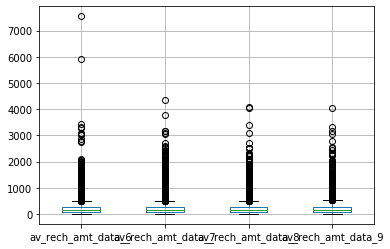

In [106]:
data[getMonthColumns('av_rech_amt')].boxplot()

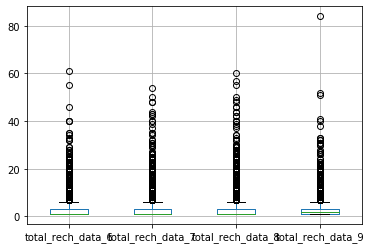

In [107]:
data[getMonthColumns('total_rech_data')].boxplot()

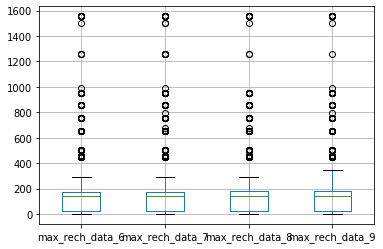

In [108]:
data[getMonthColumns('max_rech_data')].boxplot()

In [109]:
data[getMonthColumns('av_rech_amt')] = data[getMonthColumns('av_rech_amt')].fillna(0)
data[getMonthColumns('total_rech_data')] = data[getMonthColumns('total_rech_data')].fillna(0)
data[getMonthColumns('og_others')] = data[getMonthColumns('og_others')].fillna(0)
data[getMonthColumns('ic_others')] = data[getMonthColumns('ic_others')].fillna(0)
data[getMonthColumns('mou')] = data[getMonthColumns('mou')].fillna(0)

In [110]:
data.drop(columns=getMonthColumns('count'), inplace=True)
data.drop(columns=getMonthColumns('max_rech_data'), inplace=True)
data.drop(columns=getMonthColumns('fb_user'), inplace=True)
data.drop(columns=getMonthColumns('night_pck'), inplace=True)
data.drop(columns=getMonthColumns('std_og_t2c'), inplace=True)
data.drop(columns=getMonthColumns('std_ic_t2o'), inplace=True)

In [111]:
data.to_csv('data_clean.csv', index=False)

## Filtering High Value Customers

In [112]:
data = pd.read_csv('data_clean.csv')
data.shape

(99999, 169)

In [113]:
data.head()

arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.385  214.816  213.803   21.100         0.00         0.00         0.00   
1   34.047  355.074  268.321   86.285        24.11        78.68         7.68   
2  167.690  189.058  210.226  290.714        11.54        55.24        37.26   
3  221.338  251.102  508.054  389.500        99.91        54.39       310.98   
4  261.636  309.876  238.174  163.426        50.31       149.44        83.89   

   onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  monthly_3g_9  sachet_3g_6  \
0         0.00          0.00          0.00  ...             0            0   
1        18.34         15.74         99.84  ...             0            0   
2        74.81        143.33        220.59  ...             0            0   
3       241.71        123.31        109.01  ...             0            0   
4        58.78         76.96         91.88  ...             0            0   

   sachet_3g_7  sachet_3g_8  sachet_3g_9   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  \
0            0            0            0   968      30.4       0.0    101.20   
1            0            0            0  1006       0.0       0.0      0.00   
2            0            0            0  1103       0.0       0.0      4.17   
3            0            0            0  2491       0.0       0.0      0.00   
4            0            0            0  1526       0.0       0.0      0.00   

   vbc_3g_9  
0      3.58  
1      0.00  
2      0.00  
3      0.00  
4      0.00  

[5 rows x 169 columns]

In [114]:
# total data recharge amount for June and July 
data['total_data_rech_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']

# total recharge amount for June and July
data['amt_data_6'] = data['total_rech_amt_6'] + data['total_data_rech_6']
data['amt_data_7'] = data['total_rech_amt_7'] + data['total_data_rech_7']

# Average recharge done by customer in June and July
data['av_amt_data_6_7'] = (data['amt_data_6'] + data['amt_data_7'])/2

# 70th percentile recharge amount
print("70th percentile Recharge Amount: {0}".format(data['av_amt_data_6_7'].quantile(0.7)))

data = data[data['av_amt_data_6_7'] >= data['av_amt_data_6_7'].quantile(0.7)]

#remove derived columns
data.drop(columns=['total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], inplace=True)

70th percentile Recharge Amount: 478.0


In [115]:
data.to_csv('data_filtered.csv', index=False)

## Derive Churn

In [116]:
data = pd.read_csv('data_filtered.csv')
data.shape

(30001, 169)

In [117]:
data.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0   197.385   214.816   213.803   21.100         0.00         0.00   
1  1069.180  1349.850  3171.480  500.000        57.84        54.68   
2   378.721   492.223   137.362  166.787       413.69       351.03   
3   514.453   597.753   637.760  578.596       102.41       132.11   
4    74.350   193.897   366.966  811.480        48.96        50.66   

   onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  monthly_3g_9  \
0         0.00         0.00          0.00          0.00  ...             0   
1        52.29         0.00        453.43        567.16  ...             0   
2        35.08        33.46         94.66         80.63  ...             0   
3        85.14       161.63        757.93        896.68  ...             0   
4        33.58        15.74         85.41         89.36  ...             1   

   sachet_3g_6  sachet_3g_7  sachet_3g_8  sachet_3g_9  aon  vbc_3g_8  \
0            0            0            0            0  968     30.40   
1            0            0            0            0  802     57.74   
2            0            0            0            0  315     21.03   
3            0            0            0            0  720      0.00   
4            0            0            1            0  604     40.45   

   vbc_3g_7  vbc_3g_6  vbc_3g_9  
0      0.00    101.20      3.58  
1     19.38     18.74      0.00  
2    910.65    122.16      0.00  
3      0.00      0.00      0.00  
4     51.86      0.00      0.00  

[5 rows x 169 columns]

In [118]:
#Tag churners and remove attributes of the churn phase

# calculate total incoming and outgoing minutes of usage and usage of internet 2g and 3g
data['total_calls_mou_9'] = data['total_ic_mou_9'] + data['total_og_mou_9']
data['total_internet_mb_9'] =  data['vol_2g_mb_9'] + data['vol_3g_mb_9']

# create churn variable: Customers who have not used either calls or internet in the month of September are customers who have churned

# 0 - not churn, 1 - churn
data['churn'] = data.apply(lambda row: 1 if (row['total_calls_mou_9'] == 0 and row['total_internet_mb_9'] == 0) else 0, axis=1)

# delete derived variables
data.drop(columns=['total_calls_mou_9', 'total_internet_mb_9'], inplace=True)

# change data type to category
data['churn'] = data['churn'].astype("category")

# print churn ratio
print("Churn Ratio:")
print(data['churn'].value_counts()*100/data.shape[0])

Churn Ratio:
0    91.863605
1     8.136395
Name: churn, dtype: float64


In [119]:
data.drop(columns=getMonthColumns('_9'), inplace=True)

In [120]:
data.to_csv('data_derived.csv', index=False)

## EDA

In [121]:
data = pd.read_csv('data_derived.csv')
data.shape

(30001, 128)

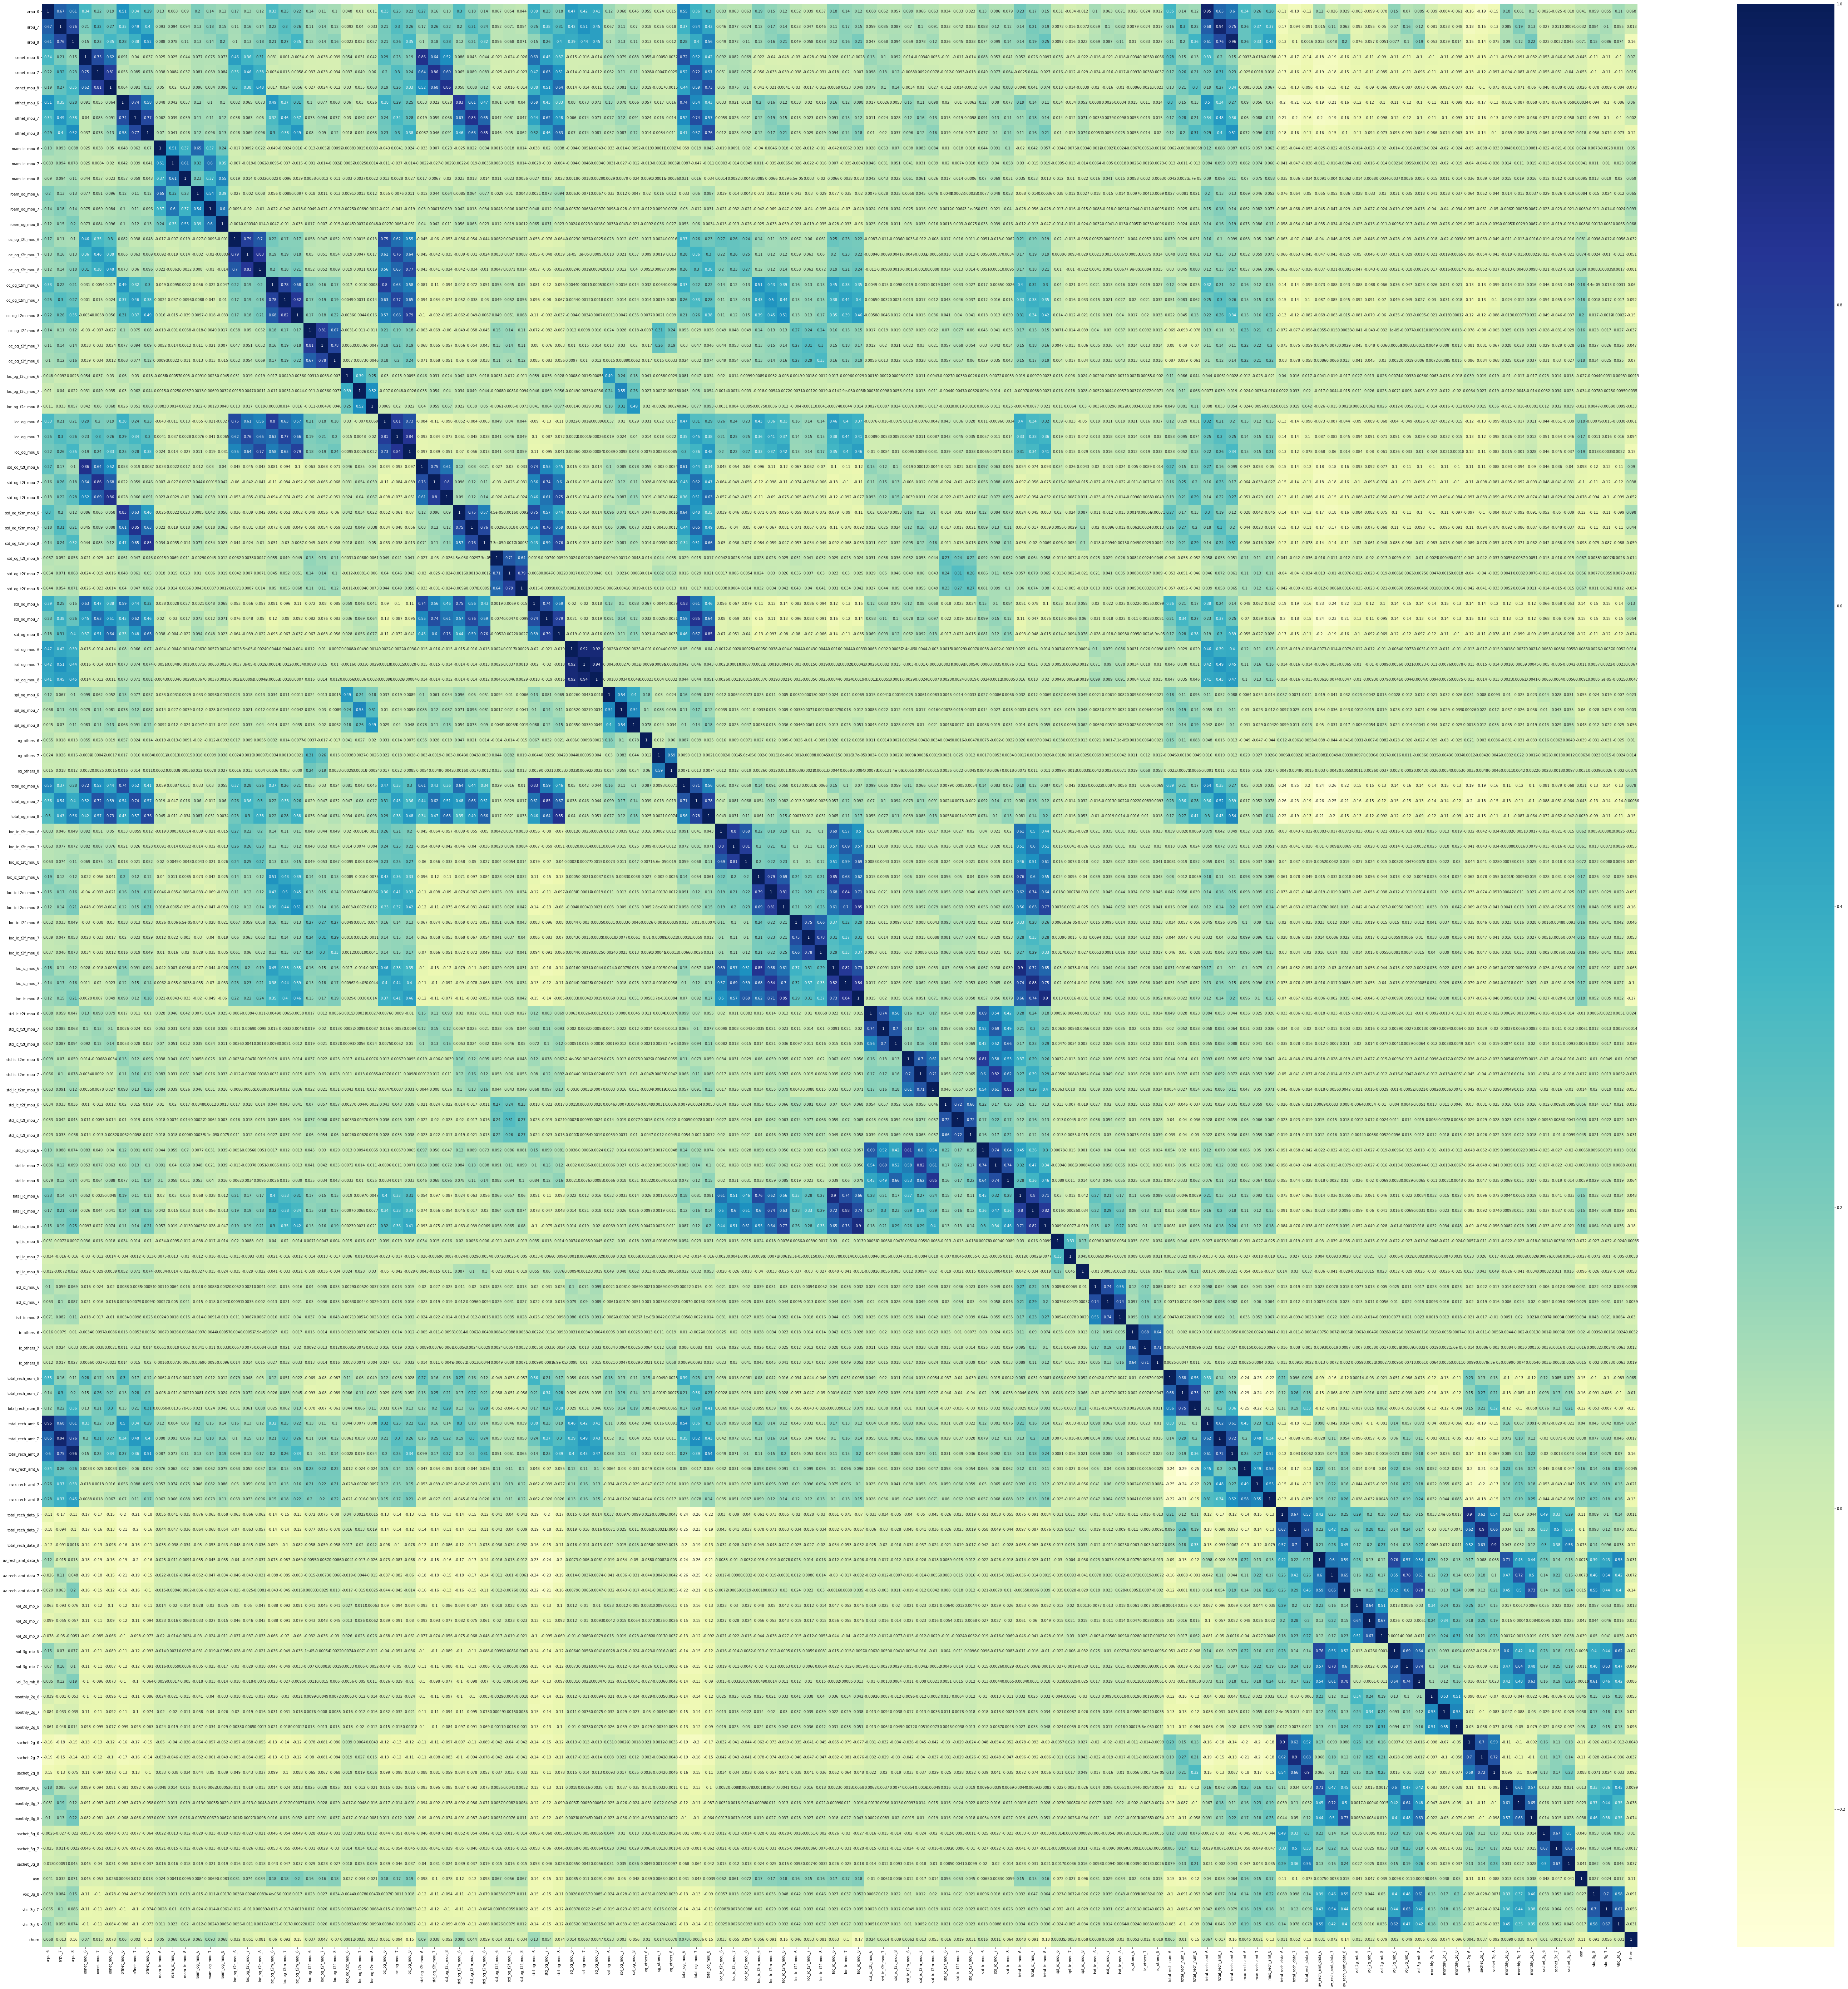

In [33]:
# correlation heatmap between
plt.figure(figsize=(100, 100))
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.savefig('heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()

In [122]:
# lets check the correlation amongst the features, drop the highly correlated ones
cor = data.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
pd.DataFrame(cor[(cor > 0.60) | (cor < -0.60)].sort_values(ascending = False)).head(200)

0
total_rech_amt_8 arpu_8            0.955351
total_rech_amt_6 arpu_6            0.946125
total_rech_amt_7 arpu_7            0.943588
isd_og_mou_8     isd_og_mou_7      0.943120
                 isd_og_mou_6      0.918187
...                                     ...
total_og_mou_7   std_og_mou_6      0.612689
arpu_8           arpu_6            0.612617
loc_ic_mou_6     loc_ic_t2m_mou_8  0.611906
total_og_mou_6   std_og_t2t_mou_6  0.611763
monthly_3g_7     monthly_3g_6      0.611599

[200 rows x 1 columns]

In [123]:
# Drop highly correlated columns
data.drop(columns=getMonthColumns('vol_2g'), inplace=True)
data.drop(columns=getMonthColumns('total_rech_amt_'), inplace=True)
data.drop(columns=getMonthColumns('loc_og_t2t') + getMonthColumns('loc_ic_t2t'), inplace=True)
data.drop(columns=getMonthColumns('loc_og_t2m') + getMonthColumns('loc_ic_t2m'), inplace=True)
data.drop(columns=getMonthColumns('std_og_t2t') + getMonthColumns('std_ic_t2t'), inplace=True)
data.drop(columns=getMonthColumns('std_og_t2m') + getMonthColumns('std_ic_t2m'), inplace=True)
data.drop(columns=getMonthColumns('total_og_mou') + getMonthColumns('total_ic_mou'), inplace=True)

In [124]:
data.shape

(30001, 92)

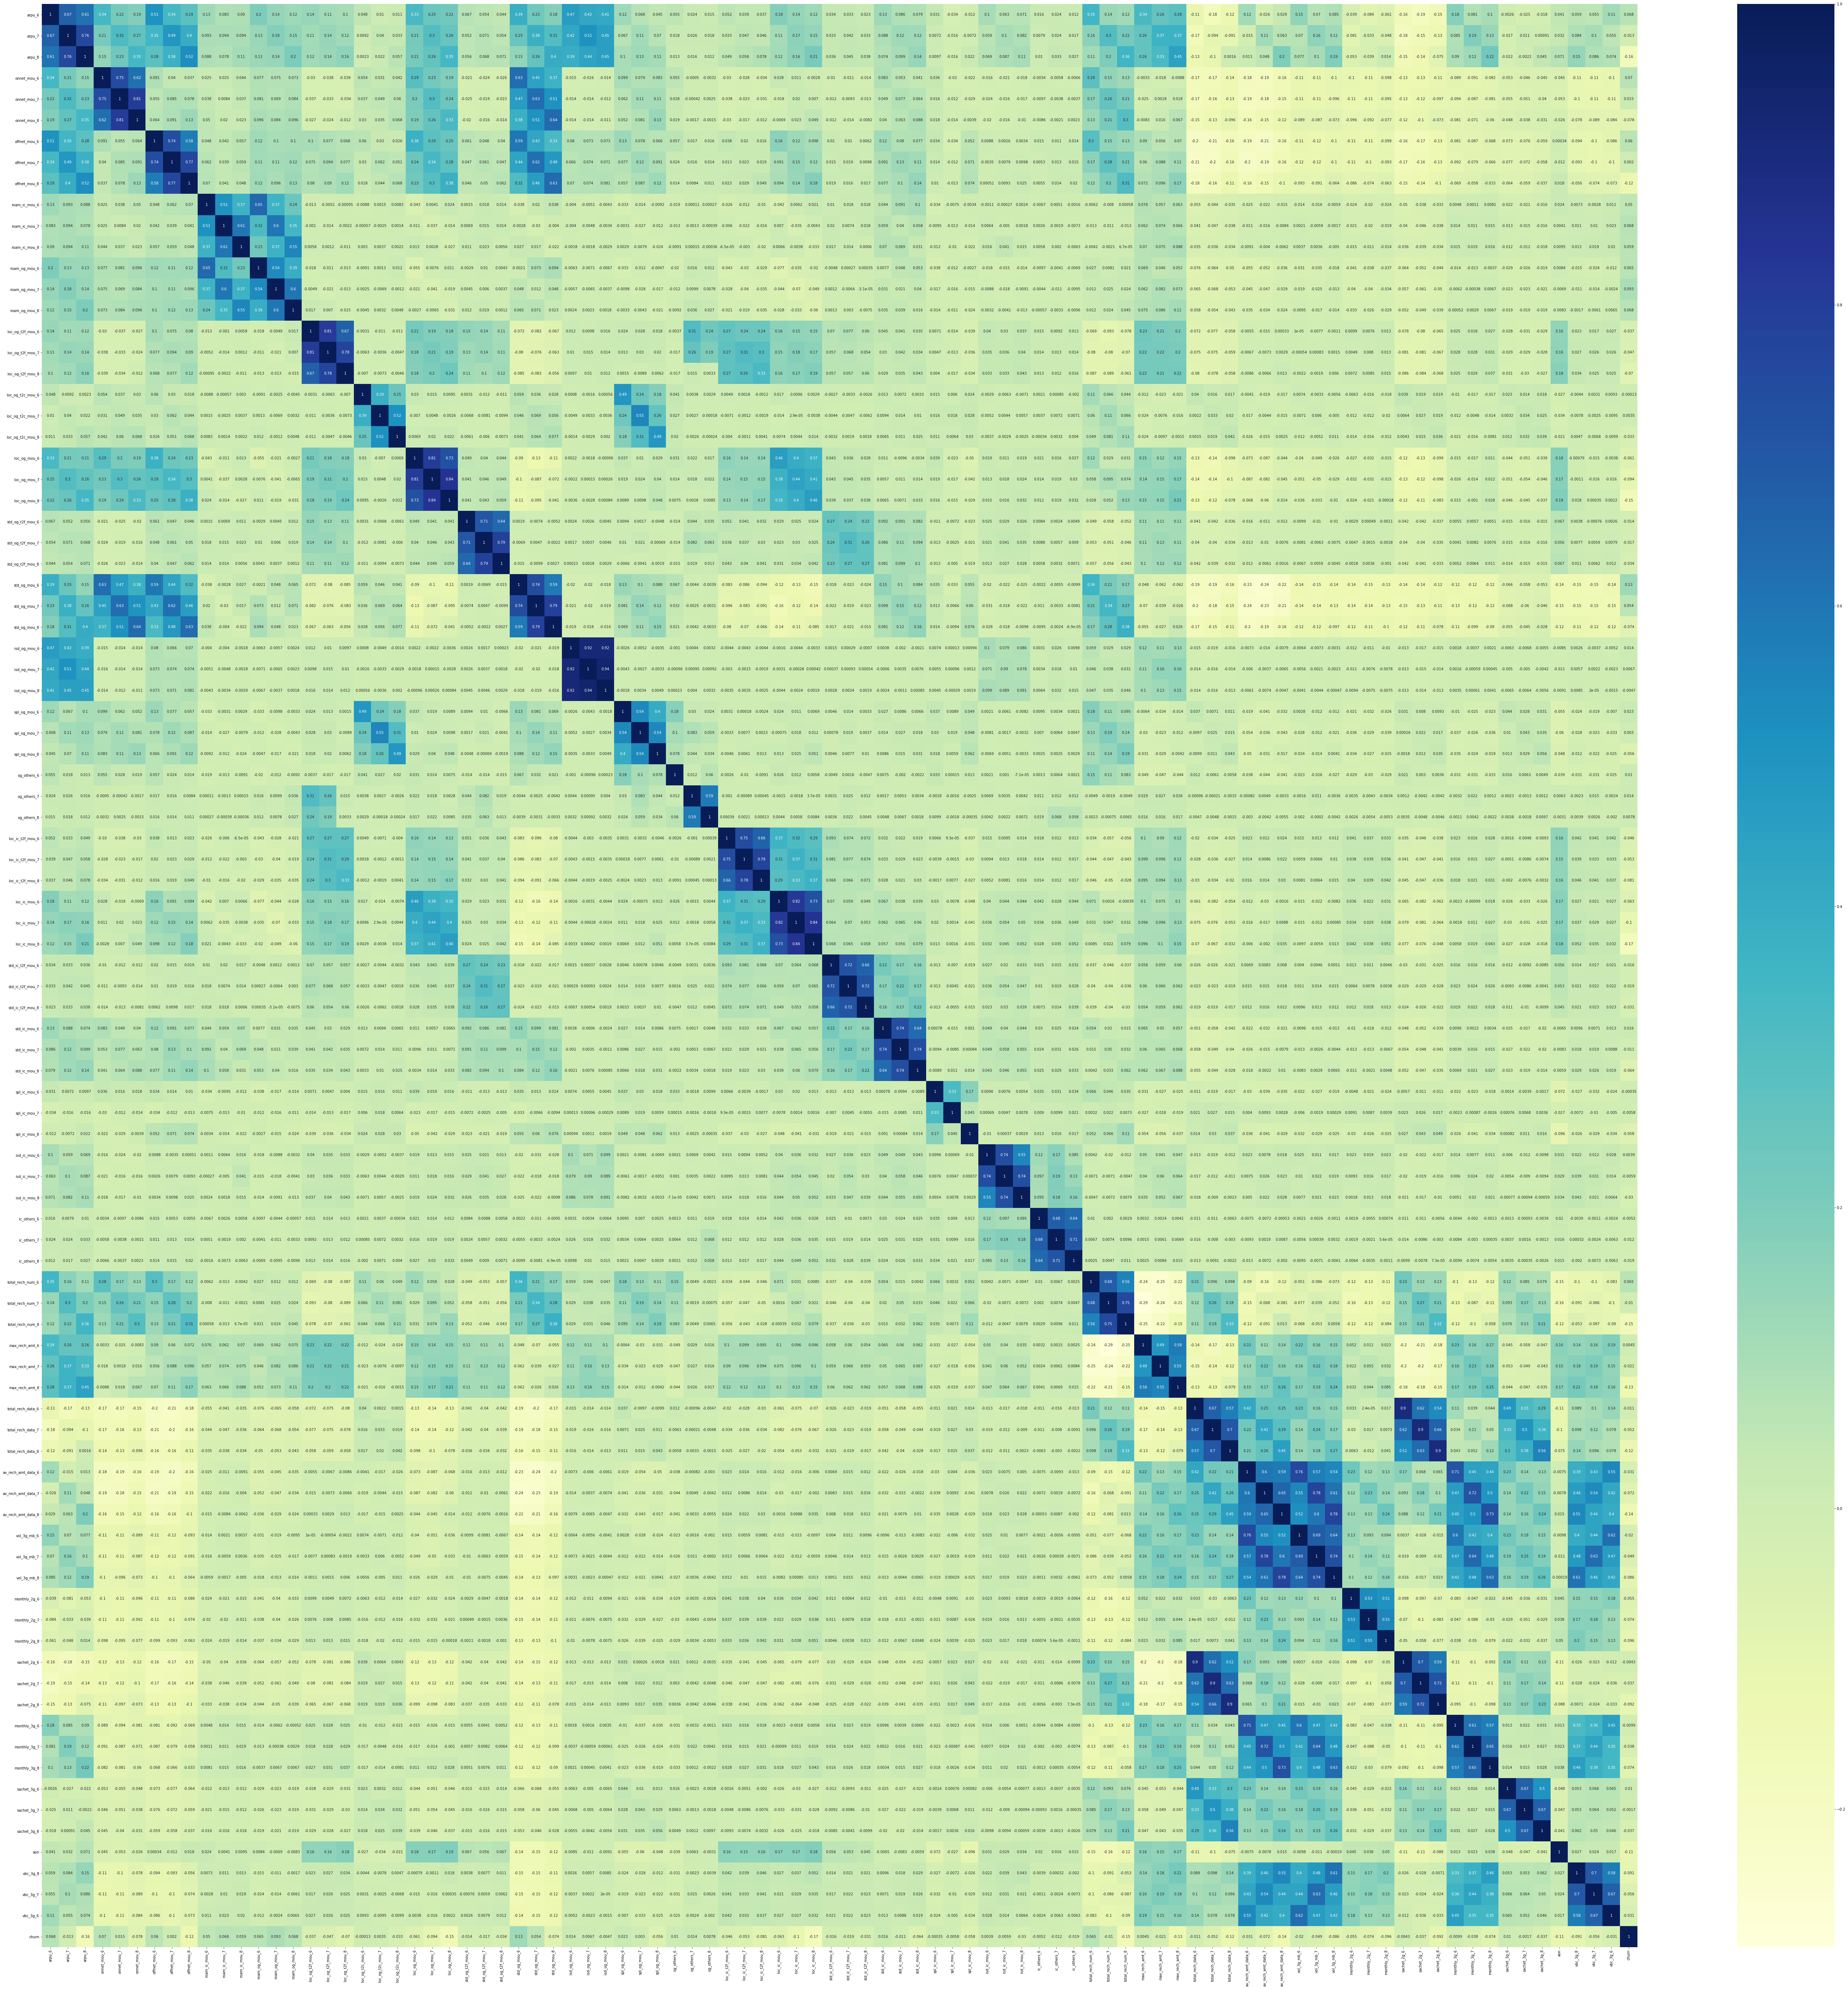

In [37]:
# correlation heatmap between
plt.figure(figsize=(100, 100))
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.savefig('heatmaps_uncorrelated.png', dpi=300, bbox_inches='tight')
plt.show()

In [125]:
data.to_csv('data_final.csv', index=False)

## Modelling

In [126]:
data = pd.read_csv('data_final.csv')
data.shape

(30001, 92)

In [127]:
data.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0   197.385   214.816   213.803         0.00         0.00         0.00   
1  1069.180  1349.850  3171.480        57.84        54.68        52.29   
2   378.721   492.223   137.362       413.69       351.03        35.08   
3   514.453   597.753   637.760       102.41       132.11        85.14   
4    74.350   193.897   366.966        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  monthly_3g_7  \
0          0.00          0.00          0.00           0.00  ...             1   
1        453.43        567.16        325.91          16.23  ...             0   
2         94.66         80.63        136.48           0.00  ...             0   
3        757.93        896.68        983.39           0.00  ...             0   
4         85.41         89.36        205.89           0.00  ...             2   

   monthly_3g_8  sachet_3g_6  sachet_3g_7  sachet_3g_8  aon  vbc_3g_8  \
0             1            0            0            0  968     30.40   
1             0            0            0            0  802     57.74   
2             0            0            0            0  315     21.03   
3             0            0            0            0  720      0.00   
4             1            0            0            1  604     40.45   

   vbc_3g_7  vbc_3g_6  churn  
0      0.00    101.20      1  
1     19.38     18.74      1  
2    910.65    122.16      0  
3      0.00      0.00      0  
4     51.86      0.00      0  

[5 rows x 92 columns]

In [128]:
y = data.pop('churn')
X = data

In [129]:
y.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [130]:
# Importing train-test-split 
from sklearn.model_selection import train_test_split

In [131]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)
X_train.head()

arpu_6    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
4788    170.878   204.784  193.741         1.73         4.33         2.56   
8447    263.255   274.638  110.863         3.64         0.00         0.00   
4535    218.729   401.336  123.394         6.46         2.24         7.68   
27580  1246.544  1783.655  785.751      1208.89       859.78       541.99   
16891   744.270   544.661  248.981       587.43       423.23        52.34   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  \
4788          35.21         35.29         57.36            0.0  ...   
8447          13.64          0.00          0.00            0.0  ...   
4535          32.29         72.36         51.53            0.0  ...   
27580       1193.03       1718.64        741.86            0.0  ...   
16891        487.91        451.76        141.43            0.0  ...   

       monthly_3g_6  monthly_3g_7  monthly_3g_8  sachet_3g_6  sachet_3g_7  \
4788              0             0             0            0            0   
8447              0             0             0            0            2   
4535              0             0             0            0            0   
27580             0             1             1            0            0   
16891             0             0             0            0            0   

       sachet_3g_8   aon  vbc_3g_8  vbc_3g_7  vbc_3g_6  
4788             0  2516      0.00       0.0       0.0  
8447             0  1326      0.00       0.0       0.0  
4535             0   303      0.00       0.0       0.0  
27580            0  1762     39.85    1955.7       0.0  
16891            0   456      0.00       0.0       0.0  

[5 rows x 91 columns]

In [132]:
y_train.value_counts() / len(y_train) * 100

0    91.847619
1     8.152381
Name: churn, dtype: float64

In [133]:
y_test.value_counts() / len(y_test) * 100

0    91.9009
1     8.0991
Name: churn, dtype: float64

### Decision Tree Classifier for interpretability

In [134]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [135]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      8272
           1       0.35      0.76      0.48       729

    accuracy                           0.87      9001
   macro avg       0.66      0.82      0.70      9001
weighted avg       0.93      0.87      0.89      9001



In [136]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7246 1026]
 [ 175  554]]
0.8665703810687702


In [137]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

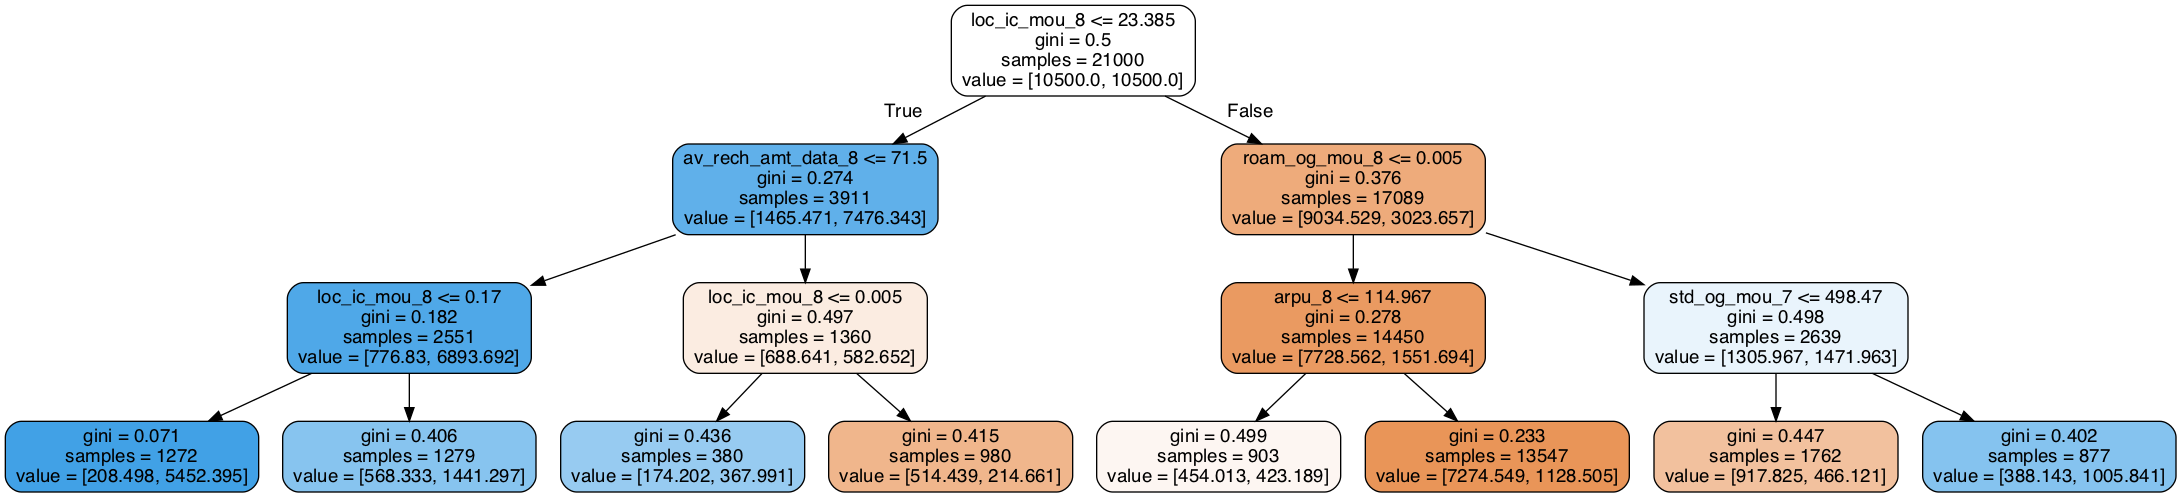

In [138]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=data.columns, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Applying PCA on train data

In [139]:
# apply pca to train data
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])
pca.fit(X_train)
X_train.info()
churn_pca = pca.fit_transform(X_train)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 4788 to 29733
Data columns (total 91 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              21000 non-null  float64
 1   arpu_7              21000 non-null  float64
 2   arpu_8              21000 non-null  float64
 3   onnet_mou_6         21000 non-null  float64
 4   onnet_mou_7         21000 non-null  float64
 5   onnet_mou_8         21000 non-null  float64
 6   offnet_mou_6        21000 non-null  float64
 7   offnet_mou_7        21000 non-null  float64
 8   offnet_mou_8        21000 non-null  float64
 9   roam_ic_mou_6       21000 non-null  float64
 10  roam_ic_mou_7       21000 non-null  float64
 11  roam_ic_mou_8       21000 non-null  float64
 12  roam_og_mou_6       21000 non-null  float64
 13  roam_og_mou_7       21000 non-null  float64
 14  roam_og_mou_8       21000 non-null  float64
 15  loc_og_t2f_mou_6    21000 non-null  float64
 16  l

In [140]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       9.49
1      17.66
2      23.78
3      28.88
4      32.65
       ...  
86    100.00
87    100.00
88    100.00
89    100.00
90    100.00
Length: 91, dtype: float64


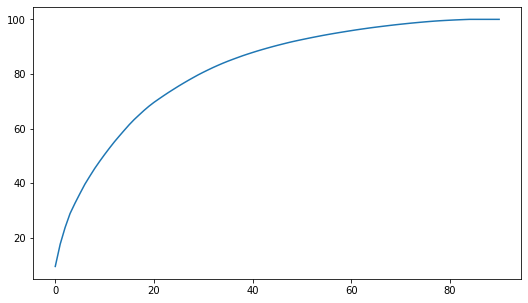

In [141]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [142]:
#PCA and Logistic Regression

# create pipeline
PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [143]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.8051904761904762

In [144]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

# class imbalance
y_train.value_counts()/y_train.shape

# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

[[6586 1686]
 [ 130  599]]
AUC:    	 0.87


In [145]:
#Random Forest

# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [146]:
# fit model
model.fit(X_train, y_train)
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:   19.6s remaining:   19.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.9min finished


Best AUC:  0.9220849214360026
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [147]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8148  124]
 [ 410  319]]
AUC:    	 0.91


In [148]:
#Choosing best features.
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

# fit model
rf_model.fit(X_train, y_train)

# OOB score
rf_model.oob_score_

# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

10


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   26.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8157  115]
 [ 419  310]]
ROC:    	 0.91


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [149]:
# predictors
features = data.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


variables  importance_percentage
0       loc_ic_mou_8               9.438888
1       loc_og_mou_8               6.817992
2             arpu_8               6.091387
3   loc_ic_t2f_mou_8               4.683934
4      roam_og_mou_8               4.012152
..               ...                    ...
86      monthly_3g_6               0.120863
87      monthly_3g_8               0.109530
88       sachet_3g_8               0.100276
89       og_others_7               0.025223
90       og_others_8               0.012489

[91 rows x 2 columns]

In [150]:
# extract top 'n' features
top_n = 30
top_features = feature_importance.variables[0:top_n]

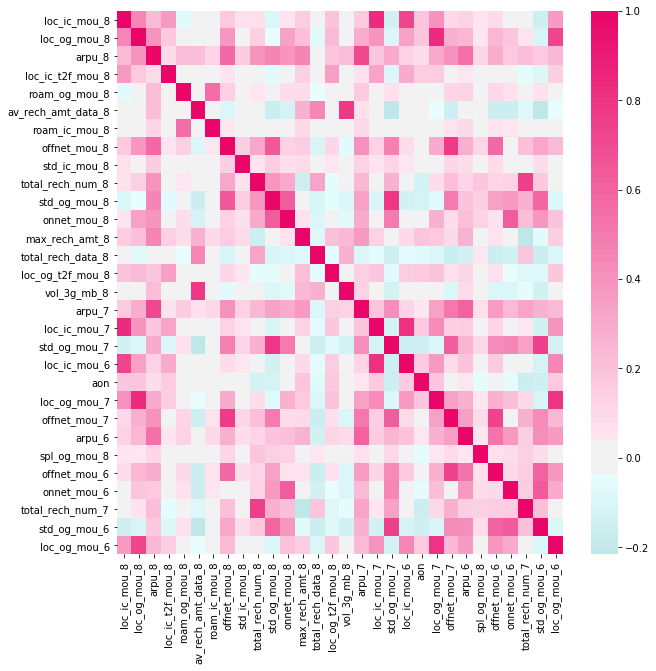

In [151]:
# plot feature correlation
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap=mycmap)